In [ ]:
# Step 1 匯入資訊
import sklearn
# 處理資料時會用到的工具
import numpy as np
import pandas as pd

# 處理視覺化會用到的工具
import matplotlib.pyplot as plt
import seaborn as sns

# 儲存模型的工具
import pickle

In [ ]:
# Step2 查看資料
dataframe = pd.read_csv("./SpotifyFeatures.csv")
dataframe.head()

genre        artist_name  ... time_signature valence
0  Movie     Henri Salvador  ...            4/4   0.814
1  Movie  Martin & les fées  ...            4/4   0.816
2  Movie    Joseph Williams  ...            5/4   0.368
3  Movie     Henri Salvador  ...            4/4   0.227
4  Movie       Fabien Nataf  ...            4/4   0.390

[5 rows x 18 columns]

In [ ]:
dataframe.describe()  # 查看統計資訊
dataframe.info()    # 查看資料型態

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232725 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

In [ ]:
print(dataframe.keys()) #查看類別項(column)

Index(['genre', 'artist_name', 'track_name', 'track_id', 'popularity',
       'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence'],
      dtype='object')


In [ ]:
# Step3 清理NAN值
pd.isnull(dataframe).sum() #無缺失資料

genre               0
artist_name         0
track_name          0
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Popularity Distribution')

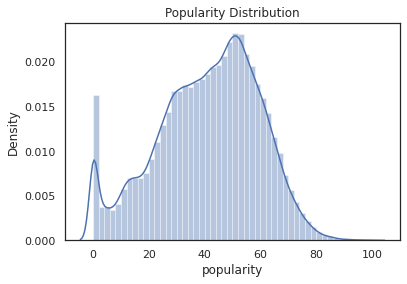

In [ ]:
# Step4 資料視覺化&分析資料
sns.set(style = "white")                          # 白色網格背景
sns.distplot(dataframe['popularity']).set_title('Popularity Distribution') # 顯示人氣密度

In [ ]:
dataframe.corr() #查看相對資料資訊

popularity  acousticness  ...     tempo   valence
popularity          1.000000     -0.381295  ...  0.081039  0.060076
acousticness       -0.381295      1.000000  ... -0.238247 -0.325798
danceability        0.256564     -0.364546  ...  0.021939  0.547154
duration_ms         0.002348      0.011203  ... -0.028456 -0.141811
energy              0.248922     -0.725576  ...  0.228774  0.436771
instrumentalness   -0.210983      0.316154  ... -0.104133 -0.307522
liveness           -0.167995      0.069004  ... -0.051355  0.011804
loudness            0.363011     -0.690202  ...  0.228364  0.399901
speechiness        -0.151076      0.150935  ... -0.081541  0.023842
tempo               0.081039     -0.238247  ...  1.000000  0.134857
valence             0.060076     -0.325798  ...  0.134857  1.000000

[11 rows x 11 columns]

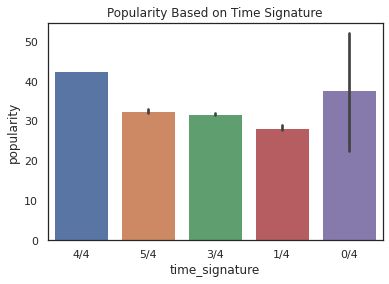

In [ ]:
# 先把等第比較少的用長條圖查看
# 查看"拍點"與"人氣度"的相關性
plt.title('Popularity Based on Time Signature') #設定圖表標題
sns.barplot(x = 'time_signature', y = 'popularity', data = dataframe) #因為拍點(time_signature)數量少，故查看長條圖

Text(0.5, 1.0, 'Popularity Based on Mode and Key')

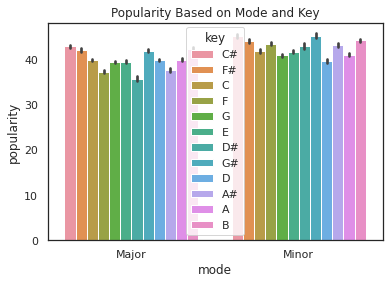

In [ ]:
# 查看"調性、大小調"與"人氣度"的相關性
sns.barplot(x = 'mode', y = 'popularity', hue = 'key', data = dataframe)
plt.title('Popularity Based on Mode and Key')

Text(0.5, 1.0, 'Popularity Based on Mode')

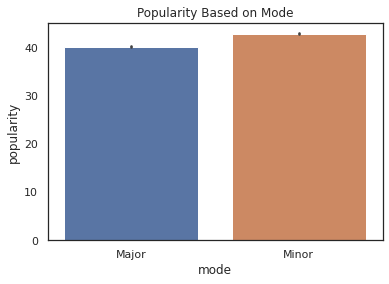

In [ ]:
# 因為大調跟小調的數量相差不大，故拉出來比較
sns.barplot(x = 'mode', y = 'popularity', data = dataframe)
plt.title('Popularity Based on Mode')

Text(0.5, 1.0, 'Popularity Based on genre')

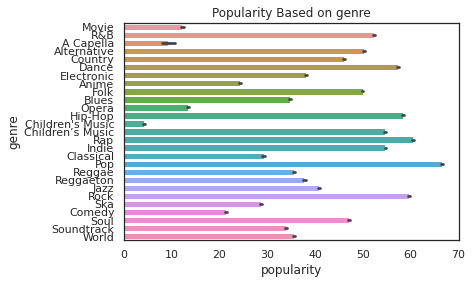

In [ ]:
sns.barplot(x = 'popularity', y = 'genre', data = dataframe)
plt.title('Popularity Based on genre')

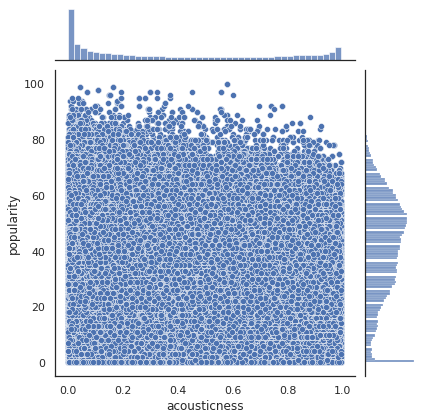

In [ ]:
# 等第多的用散布圖(Scatter)查看
# 但我們發現因為scatter的點太大了，不易觀察，故使用混合版觀察，顏色深淺為密集程度
sns.jointplot(x = 'acousticness', y = 'popularity', data = dataframe) 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Acoustiness for Songs with More than 50 Popularity')

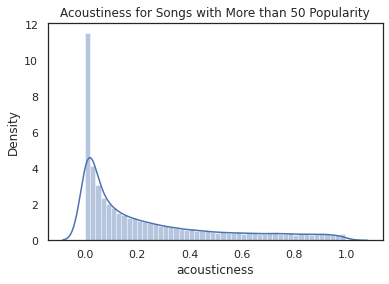

In [ ]:
# 去分析前50%有名的原聲程度
popular_above_50 = dataframe[dataframe.popularity > 50] # 前50%有名的data
sns.distplot(popular_above_50['acousticness'])
plt.title('Acoustiness for Songs with More than 50 Popularity')
#結論：非電子音不是現在的趨勢

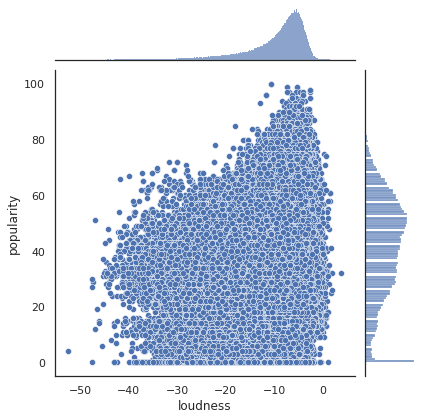

In [ ]:
sns.jointplot(x = 'loudness', y = 'popularity', data = dataframe)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Loudness for Songs with More than 50 Popularity')

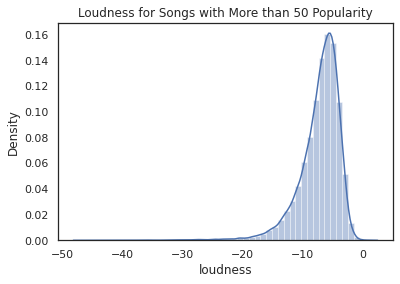

In [ ]:
# 去分析前50%有名的響度程度
popular_above_50 = dataframe[dataframe.popularity > 50] # 前50%有名的data
sns.distplot(popular_above_50['loudness'])
plt.title('Loudness for Songs with More than 50 Popularity')
#結論：非電子音不是現在的趨勢

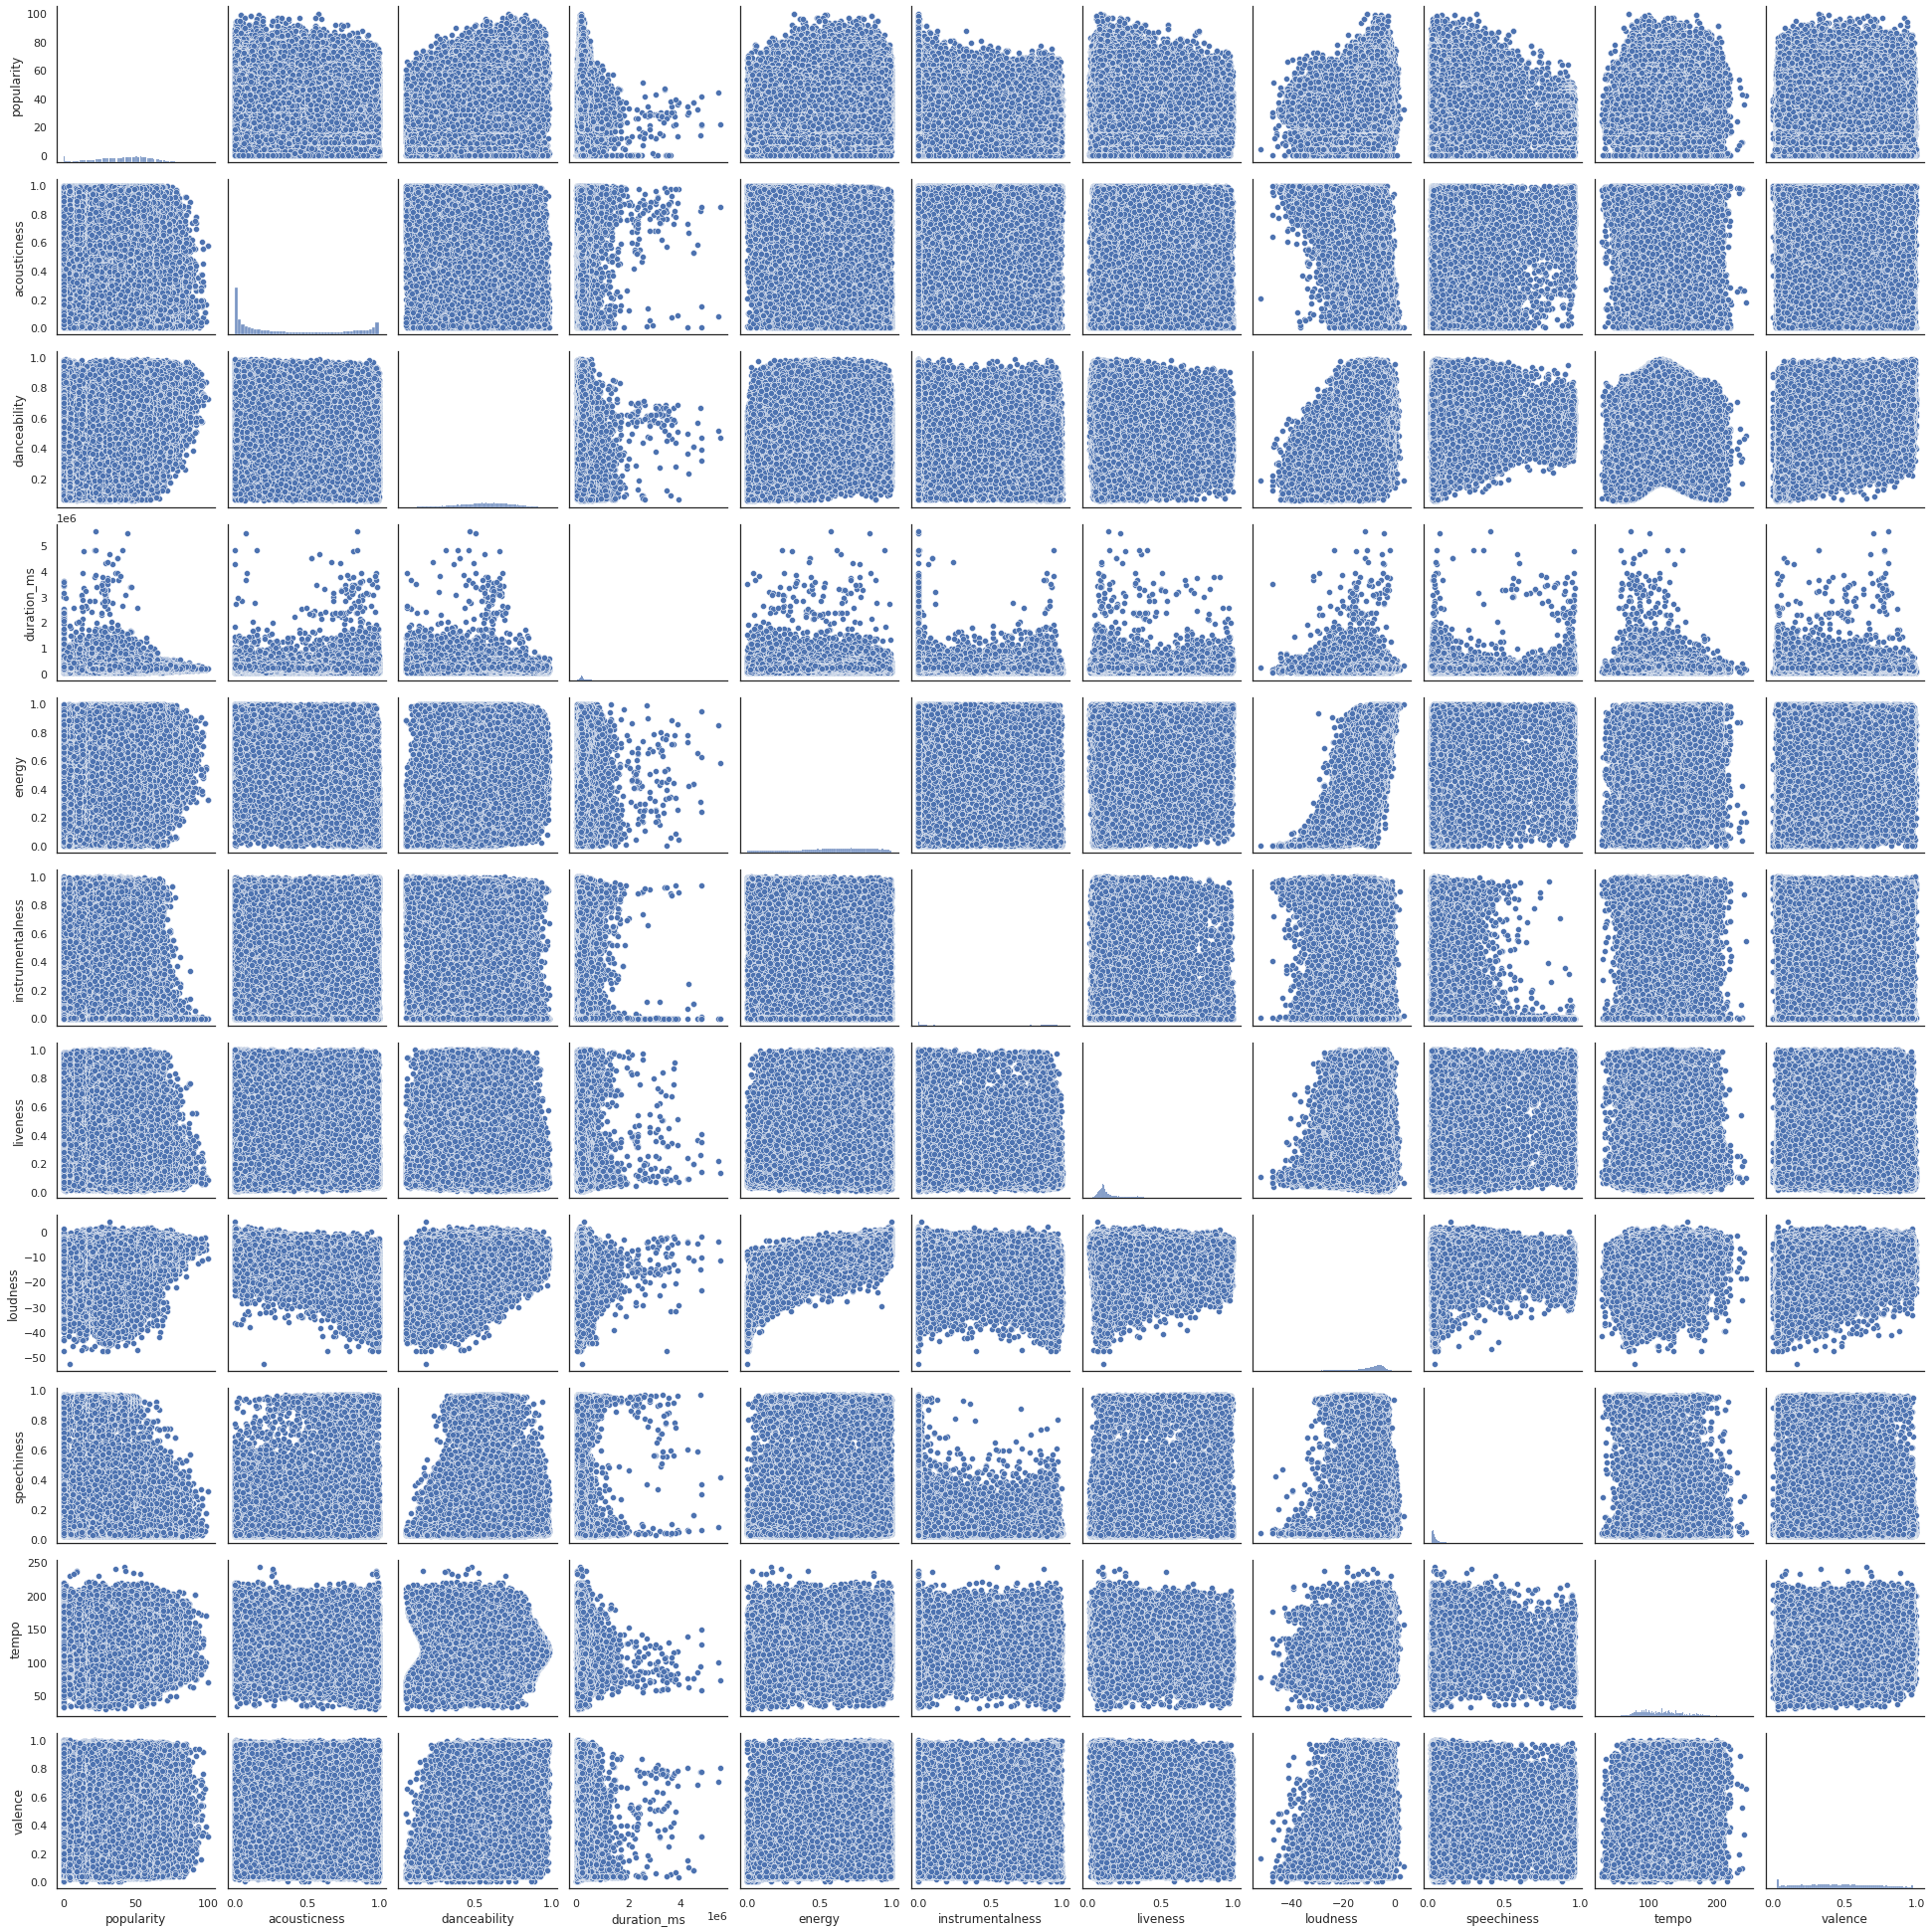

In [ ]:
# 查看各屬性間的相關程度來做分析
sns.pairplot(dataframe)

In [ ]:
# Step 5 把固定蚊子轉成等第
# Key有12個可以做分類
list_of_keys = dataframe['key'].unique() # 設定各種不一樣的key種類

#用for迴圈去偵測key，替key去做分類
for i in range(len(list_of_keys)):
    dataframe.loc[dataframe['key'] == list_of_keys[i], 'key'] = i

dataframe.sample(5) #check

genre    artist_name  ... time_signature valence
39895    Electronic         Datsik  ...            4/4  0.5400
198090   Soundtrack   Howard Shore  ...            4/4  0.0798
67655       Hip-Hop     BlocBoy JB  ...            4/4  0.8060
12768   Alternative           MGMT  ...            4/4  0.3990
180882         Jazz  Jimmy Durante  ...            4/4  0.6000

[5 rows x 18 columns]

In [ ]:
# 方法同key
list_of_mode = dataframe['mode'].unique()


for i in range(len(list_of_mode)):
    dataframe.loc[dataframe['mode'] == list_of_mode[i], 'mode'] = i

dataframe.sample(5) #check

genre        artist_name  ... time_signature valence
44391          Folk  Christopher Cross  ...            4/4   0.504
118513          Rap       Clyde Carson  ...            4/4   0.170
94861         Indie             Halsey  ...            4/4   0.750
113628          Pop    Sebastian Yatra  ...            4/4   0.658
27725   Alternative     Puddle Of Mudd  ...            4/4   0.521

[5 rows x 18 columns]

In [ ]:
# 方法同key
list_of_time_signatures = dataframe['time_signature'].unique()
for i in range(len(list_of_time_signatures)):
    dataframe.loc[dataframe['time_signature'] == list_of_time_signatures[i], 'time_signature'] = i
dataframe.sample(5)

genre     artist_name  ... time_signature valence
20678        Dance      Jamiroquai  ...              0  0.5790
201546  Soundtrack    James Horner  ...              2  0.0369
136724      Reggae        Natiruts  ...              0  0.6270
215710     Country    Mason Ramsey  ...              0  0.5100
211880      Comedy  Frank Caliendo  ...              3  0.5920

[5 rows x 18 columns]

In [ ]:
# 方法同key
list_of_genre = dataframe['genre'].unique()
for i in range(len(list_of_genre)):
    dataframe.loc[dataframe['genre'] == list_of_genre[i], 'genre'] = i
dataframe.sample(5)

genre      artist_name  ... time_signature valence
104885    16   Claude Debussy  ...              2  0.0662
123287    16  Frédéric Chopin  ...              2  0.0400
38947      6   Boombox Cartel  ...              0  0.4950
167732    23     Jim Gaffigan  ...              0  0.2150
139972    19   Wisin & Yandel  ...              0  0.3870

[5 rows x 18 columns]

In [ ]:
# 設定前 57%為有名
dataframe.loc[dataframe['popularity'] < 57, 'popularity'] = 0 
dataframe.loc[dataframe['popularity'] >= 57, 'popularity'] = 1
dataframe.loc[dataframe['popularity'] == 1]

genre     artist_name  ... time_signature valence
135        1   Mary J. Blige  ...              0  0.6930
136        1         Rihanna  ...              2  0.3230
137        1       Yung Bleu  ...              0  0.0862
138        1        Surfaces  ...              0  0.7680
139        1  Olivia O'Brien  ...              0  0.4660
...      ...             ...  ...            ...     ...
230312    24     James Brown  ...              0  0.8580
230782    24    Alex Hepburn  ...              0  0.6130
230817    24    Paloma Faith  ...              0  0.5660
230946    24     James Brown  ...              0  0.9140
231493    24      Simply Red  ...              0  0.6410

[49104 rows x 18 columns]

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


from sklearn.metrics import make_scorer, accuracy_score, roc_auc_score 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [ ]:
# 模型訓練 - 前置作業
features = ["acousticness", "danceability", "duration_ms", "energy", "instrumentalness", "key", "liveness", "mode", "speechiness", "tempo", "time_signature", "valence"] #設定特徵值
training = dataframe.sample(frac = 0.8,random_state = 420) # 設定training抽取數據中的80%
X_train = training[features]
y_train = training['popularity']
X_test = dataframe.drop(training.index)[features] # 為了避免出現考古題的情況，把拿來train的data砍掉
y_test = dataframe.drop(training.index)['popularity']

In [ ]:
#train_test_split(train_data,train_target,test_size = 0.4, random_state=0)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.2, random_state = 420) # 再從train_set分出valid_set(檢驗用)

In [ ]:
# 模型訓練 - Logistic Regression
LR_Model = LogisticRegression()    #設定回歸分析
LR_Model.fit(X_train, y_train)
LR_Predict = LR_Model.predict(X_valid)
LR_Accuracy = accuracy_score(y_valid, LR_Predict)
print("Accuracy: " + str(LR_Accuracy))

LR_AUC = roc_auc_score(y_valid, LR_Predict) 
print("AUC: " + str(LR_AUC))

pickle.dump(LR_Model,open('./LR_Model.pickle','wb')) #儲存模型

Accuracy: 0.7895316360511333
AUC: 0.5


In [ ]:
# 模型訓練 - Random Forest Classifier
RFC_Model = RandomForestClassifier()
RFC_Model.fit(X_train, y_train)
RFC_Predict = RFC_Model.predict(X_valid)
RFC_Accuracy = accuracy_score(y_valid, RFC_Predict)
print("Accuracy: " + str(RFC_Accuracy))

RFC_AUC = roc_auc_score(y_valid, RFC_Predict) 
print("AUC: " + str(RFC_AUC))

pickle.dump(RFC_Model,open('./RFC_Model.pickle','wb')) #儲存模型

Accuracy: 0.9211784294768504
AUC: 0.8331955656607462


In [ ]:
# 模型訓練 - KNN
KNN_Model = KNeighborsClassifier()
KNN_Model.fit(X_train, y_train)
KNN_Predict = KNN_Model.predict(X_valid)
KNN_Accuracy = accuracy_score(y_valid, KNN_Predict)
print("Accuracy: " + str(KNN_Accuracy))

KNN_AUC = roc_auc_score(y_valid, KNN_Predict) 
print("AUC: " + str(KNN_AUC))

pickle.dump(KNN_Model,open('./KNN_Model.pickle','wb')) #儲存模型

Accuracy: 0.7736330432914383
AUC: 0.6156631913174396


In [ ]:
# 模型訓練 - 決策樹(Decision Tree Classifier)
DT_Model = DecisionTreeClassifier()
DT_Model.fit(X_train, y_train)
DT_Predict = DT_Model.predict(X_valid)
DT_Accuracy = accuracy_score(y_valid, DT_Predict)
print("Accuracy: " + str(DT_Accuracy))

DT_AUC = roc_auc_score(y_valid, DT_Predict) 
print("AUC: " + str(DT_AUC))

pickle.dump(DT_Model,open('./DT_Model.pickle','wb')) #儲存模型

Accuracy: 0.852615748200666
AUC: 0.8114406685039268


In [ ]:
# Step 6 測試模型

# 模型測試 - Logistic Regression
LR_Model_Testing = pickle.load(open('./LR_Model.pickle', 'rb')) # 讀入模型
y_pred = LR_Model_Testing.predict(X_test)
LR_ACC = accuracy_score(y_test,y_pred)
LR_AUC_test = roc_auc_score(y_test,y_pred)
print("Test_Accuracy = "+ str(LR_ACC))
print("Test_AUC = "+ str(LR_AUC_test))

Test_Accuracy = 0.7885272317112472
Test_AUC = 0.5


In [ ]:
# 模型測試 - Random Forest Classifier
RFC_Model_Testing = pickle.load(open('./RFC_Model.pickle', 'rb')) # 讀入模型
y_pred_RFC = RFC_Model_Testing.predict(X_test)
RFC_ACC = accuracy_score(y_test,y_pred_RFC)
RFC_AUC_test = roc_auc_score(y_test,y_pred_RFC)
print("Test_Accuracy = "+ str(RFC_ACC))
print("Test_AUC = "+ str(RFC_AUC_test))

Test_Accuracy = 0.9211945429154581
Test_AUC = 0.8338603295874708


In [ ]:
# 模型測試 - KNN
KNN_Model_Testing = pickle.load(open('./KNN_Model.pickle', 'rb')) # 讀入模型
y_pred = KNN_Model_Testing.predict(X_test)
KNN_ACC = accuracy_score(y_test,y_pred)
KNN_AUC_test = roc_auc_score(y_test,y_pred)
print("Test_Accuracy = "+ str(KNN_ACC))
print("Test_AUC = "+ str(KNN_AUC_test))

Test_Accuracy = 0.7723493393490171
Test_AUC = 0.6185877762645647


In [ ]:
# 模型測試 - 決策樹(Decision Tree Classifier)
DT_Model_Testing = pickle.load(open('./DT_Model.pickle', 'rb')) # 讀入模型
y_pred = DT_Model_Testing.predict(X_test)
DT_ACC = accuracy_score(y_test,y_pred)
DT_AUC_test = roc_auc_score(y_test,y_pred)
print("Test_Accuracy = "+ str(DT_ACC))
print("Test_AUC = "+ str(DT_AUC_test))

Test_Accuracy = 0.8531958319905468
Test_AUC = 0.8117834337832098


In [ ]:
# Step 7 比較與總結
model_performance_accuracy = pd.DataFrame({'Model': ['LogisticRegression', 
                            'RandomForestClassifier', 
                            'KNeighborsClassifier',
                            'DecisionTreeClassifier',
                            ],
                            'Accuracy': [LR_Accuracy,
                                   RFC_Accuracy,
                                   KNN_Accuracy,
                                   DT_Accuracy,
                                   ]
                            })

model_performance_AUC = pd.DataFrame({'Model': ['LogisticRegression', 
                          'RandomForestClassifier', 
                          'KNeighborsClassifier',
                          'DecisionTreeClassifier',
                          ],
                    'AUC': [LR_AUC,RFC_AUC,KNN_AUC,DT_AUC,]})


test_performance_accuracy = pd.DataFrame({'Test': ['LogisticRegression', 
                            'RandomForestClassifier', 
                            'KNeighborsClassifier',
                            'DecisionTreeClassifier',
                            ],
                            'Accuracy': [LR_ACC,
                                   RFC_ACC,
                                   KNN_ACC,
                                   DT_ACC,
                                   ]
                            })

test_performance_AUC = pd.DataFrame({'Test': ['LogisticRegression', 
                          'RandomForestClassifier', 
                          'KNeighborsClassifier',
                          'DecisionTreeClassifier',
                          ],
                    'AUC': [LR_AUC_test,RFC_AUC_test,KNN_AUC_test,DT_AUC_test]})

In [ ]:
model_performance_accuracy.sort_values(by = "Accuracy", ascending = False) # 輸出

Model  Accuracy
1  RandomForestClassifier  0.921178
3  DecisionTreeClassifier  0.852616
0      LogisticRegression  0.789532
2    KNeighborsClassifier  0.773633

In [ ]:
test_performance_accuracy.sort_values(by = "Accuracy", ascending = False) # 輸出

Test  Accuracy
1  RandomForestClassifier  0.921195
3  DecisionTreeClassifier  0.853196
0      LogisticRegression  0.788527
2    KNeighborsClassifier  0.772349

In [ ]:
model_performance_AUC.sort_values(by = "AUC", ascending = False)  # 輸出

Model       AUC
1  RandomForestClassifier  0.833196
3  DecisionTreeClassifier  0.811441
2    KNeighborsClassifier  0.615663
0      LogisticRegression  0.500000

In [ ]:
test_performance_AUC.sort_values(by = "AUC", ascending = False)  # 輸出

Test       AUC
1  RandomForestClassifier  0.833860
3  DecisionTreeClassifier  0.811783
2    KNeighborsClassifier  0.618588
0      LogisticRegression  0.500000